In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio
import os
import seaborn as sns




In [2]:
# Load the data
df = pd.read_csv('data/global-land-use-since-10000bc.csv')


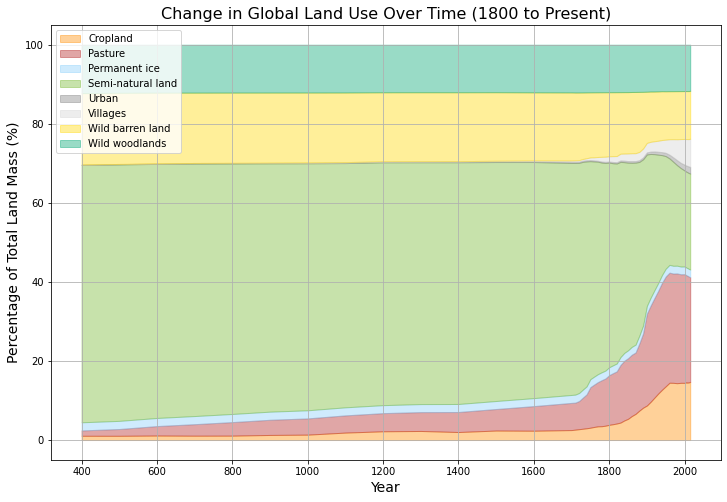

In [9]:

# Convert the 'Year' column to an integer format
df['Year'] = df['Year'].astype(int)

# Filter to only include data from 1800 to the most recent year
df = df[df['Year'] >= 400]

# Group by 'Year' and 'Entity' and sum 'area_aggregated_categories'
df_grouped = df.groupby(['Year', 'Entity'])['area_aggregated_categories'].sum().reset_index()

# Pivot the grouped data so that each type of land use is a column
df_pivot = df_grouped.pivot(index='Year', columns='Entity', values='area_aggregated_categories')

# Fill missing values with 0
df_pivot = df_pivot.fillna(0)

# Calculate the total land mass for each year
total_land_mass = df_pivot.sum(axis=1)

# Convert each type of land use to a percentage of the total land mass
df_pivot = df_pivot.divide(total_land_mass, axis=0) * 100




# Define a custom color palette using hex color codes
custom_palette = {
    'Cropland': '#FF8C00',  # Dark orange
    'Pasture': '#B22222',  # Firebrick
    'Wild barren land': '#FFD700',  # Gold
    'Permanent ice': '#87CEFA',  # Light sky blue
    'Wild woodlands': '#00A572',  # Forest green
    'Semi-natural land':'#74B72E',        
    'Urban': '#808080', # Gray
    'Vilages': '#808080'  # Gray
}


# Create a new figure
plt.figure(figsize=(12, 8))

# Initialize a variable to store the cumulative sum
cumulative_sum = np.zeros_like(df_pivot.iloc[:, 0])

# Plot a stacked area chart
for column in df_pivot.columns:
    color = custom_palette.get(column, 'lightgray')  # Use a light gray color for any other types of land use
    plt.fill_between(df_pivot.index, cumulative_sum, cumulative_sum + df_pivot[column], color=color, alpha=0.4)
    cumulative_sum += df_pivot[column]

# Set labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Total Land Mass (%)', fontsize=14)
plt.title('Change in Global Land Use Over Time (1800 to Present)', fontsize=16)

# Add a grid
plt.grid(True)

# Add a legend
plt.legend(df_pivot.columns, loc='upper left')

# Show the plot
plt.show()


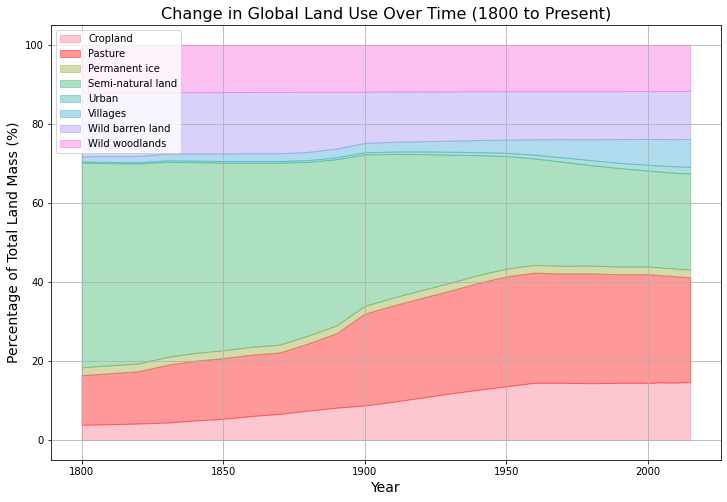

In [7]:

# Convert the 'Year' column to an integer format
df['Year'] = df['Year'].astype(int)

# Filter to only include data from 1800 to the most recent year
df = df[df['Year'] >= 1800]

# Group by 'Year' and 'Entity' and sum 'area_aggregated_categories'
df_grouped = df.groupby(['Year', 'Entity'])['area_aggregated_categories'].sum().reset_index()

# Pivot the grouped data so that each type of land use is a column
df_pivot = df_grouped.pivot(index='Year', columns='Entity', values='area_aggregated_categories')

# Fill missing values with 0
df_pivot = df_pivot.fillna(0)

# Calculate the total land mass for each year
total_land_mass = df_pivot.sum(axis=1)

# Convert each type of land use to a percentage of the total land mass
df_pivot = df_pivot.divide(total_land_mass, axis=0) * 100

# Set the color palette
colors = sns.color_palette('husl', n_colors=len(df_pivot.columns))

# Create a new figure
plt.figure(figsize=(12, 8))

# Initialize a variable to store the cumulative sum
cumulative_sum = np.zeros_like(df_pivot.iloc[:, 0])

# Plot a stacked area chart
for column, color in zip(df_pivot.columns, colors):
    if column == 'Pasture':
        plt.fill_between(df_pivot.index, cumulative_sum, cumulative_sum + df_pivot[column], color='red', alpha=0.4)
    else:
        plt.fill_between(df_pivot.index, cumulative_sum, cumulative_sum + df_pivot[column], color=color, alpha=0.4)
    cumulative_sum += df_pivot[column]

# Set labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Total Land Mass (%)', fontsize=14)
plt.title('Change in Global Land Use Over Time (1800 to Present)', fontsize=16)

# Add a grid
plt.grid(True)

# Add a legend
plt.legend(df_pivot.columns, loc='upper left')

# Show the plot
plt.show()

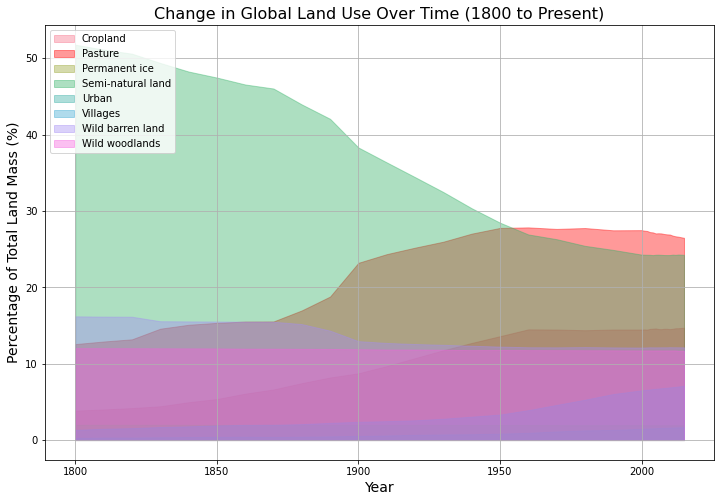

In [6]:
# Convert the 'Year' column to an integer format
df['Year'] = df['Year'].astype(int)

# Filter to only include data from 1800 to the most recent year
df = df[df['Year'] >= 1800]

# Group by 'Year' and 'Entity' and sum 'area_aggregated_categories'
df_grouped = df.groupby(['Year', 'Entity'])['area_aggregated_categories'].sum().reset_index()

# Pivot the grouped data so that each type of land use is a column
df_pivot = df_grouped.pivot(index='Year', columns='Entity', values='area_aggregated_categories')

# Fill missing values with 0
df_pivot = df_pivot.fillna(0)

# Calculate the total land mass for each year
total_land_mass = df_pivot.sum(axis=1)

# Convert each type of land use to a percentage of the total land mass
df_pivot = df_pivot.divide(total_land_mass, axis=0) * 100

# Set the color palette
colors = sns.color_palette('husl', n_colors=len(df_pivot.columns))

# Create a new figure
plt.figure(figsize=(12, 8))

# Plot a stacked area chart
for column, color in zip(df_pivot.columns, colors):
    if column == 'Pasture':
        plt.fill_between(df_pivot.index, df_pivot[column], color='red', alpha=0.4)
    else:
        plt.fill_between(df_pivot.index, df_pivot[column], color=color, alpha=0.4)

# Set labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Total Land Mass (%)', fontsize=14)
plt.title('Change in Global Land Use Over Time (1800 to Present)', fontsize=16)

# Add a grid
plt.grid(True)

# Add a legend
plt.legend(df_pivot.columns, loc='upper left')

# Show the plot
plt.show()

In [30]:

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()



In [31]:

# Convert the 'Year' column to datetime
df['Year'] = pd.to_datetime(df['Year'])


In [32]:
# Filter to only include data from 1800 to the most recent year
df = df[df['Year'].dt.year >= 1800]

# Sort the data by 'Year'
df = df.sort_values('Year')





In [33]:
# Create a directory to store the images
if not os.path.exists('images'):
    os.makedirs('images')

In [42]:
# Create a chart for each year and save as an image
for year in df['Year'].unique():
    fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the images
    df_year = df[df['Year'] == year]
    df_year.set_index('Entity')['area_aggregated_categories'].plot(kind='bar', ax=ax)
    ax.set_xticklabels([])  # Remove x-axis labels
    ax.set_yticklabels([])  # Remove y-axis labels
    plt.savefig(f'images/{year}.png', dpi=300)  # Increase the resolution of the images
    plt.close()  # Clear the figure

In [43]:
# Create a GIF from the images
images = []
for year in df['Year'].unique():
    images.append(imageio.imread(f'images/{year}.png'))
imageio.mimsave('time_lapse1.gif', images, duration=0.5)  # Increase the duration of each frame


